In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [ ]:
# Load the training data

class_data = pd.read_csv('/content/class.csv')
class_data.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [ ]:
# Load the testing data

zoo_data = pd.read_csv('/content/zoo.csv')
zoo_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Zoo Data Cleaning

In [ ]:
# Find duplicates in the dataset.
duplicates = zoo_data[zoo_data.duplicated(subset='animal_name')]
print(duplicates)

   animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
26        frog     0         0     1     0         0        1         1   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
26        1         1         1         1     0     4     0         0   

    catsize  class_type  
26        0           5  


In [ ]:
# Drop duplicates
zoo_data.drop_duplicates(subset='animal_name', inplace=True)
zoo_data.head(30)


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [ ]:
# Remove the vampire from the dataset.
zoo_data = zoo_data[zoo_data['animal_name'] != 'vampire']

In [ ]:
# Rename the animal_name "girl" to "human".
zoo_data.loc[zoo_data['animal_name'] == 'girl', 'animal_name'] = 'human'
zoo_data.head(30)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [ ]:
# Check the datatypes of the dataset.
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  99 non-null     object
 1   hair         99 non-null     int64 
 2   feathers     99 non-null     int64 
 3   eggs         99 non-null     int64 
 4   milk         99 non-null     int64 
 5   airborne     99 non-null     int64 
 6   aquatic      99 non-null     int64 
 7   predator     99 non-null     int64 
 8   toothed      99 non-null     int64 
 9   backbone     99 non-null     int64 
 10  breathes     99 non-null     int64 
 11  venomous     99 non-null     int64 
 12  fins         99 non-null     int64 
 13  legs         99 non-null     int64 
 14  tail         99 non-null     int64 
 15  domestic     99 non-null     int64 
 16  catsize      99 non-null     int64 
 17  class_type   99 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 14.7+ KB


In [ ]:
# Change the datatype of the boolean columns to bool.
boolean_columns = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize']
zoo_data[boolean_columns] = zoo_data[boolean_columns].astype(bool)

In [ ]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  99 non-null     object
 1   hair         99 non-null     bool  
 2   feathers     99 non-null     bool  
 3   eggs         99 non-null     bool  
 4   milk         99 non-null     bool  
 5   airborne     99 non-null     bool  
 6   aquatic      99 non-null     bool  
 7   predator     99 non-null     bool  
 8   toothed      99 non-null     bool  
 9   backbone     99 non-null     bool  
 10  breathes     99 non-null     bool  
 11  venomous     99 non-null     bool  
 12  fins         99 non-null     bool  
 13  legs         99 non-null     int64 
 14  tail         99 non-null     bool  
 15  domestic     99 non-null     bool  
 16  catsize      99 non-null     bool  
 17  class_type   99 non-null     int64 
dtypes: bool(15), int64(2), object(1)
memory usage: 4.5+ KB


In [ ]:
# Reset the index of the DataFrame.
zoo_data = zoo_data.reset_index(drop=True)
zoo_data.head(30)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,1
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,1
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,4
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,1
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,1
5,buffalo,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,1
6,calf,True,False,False,True,False,False,False,True,True,True,False,False,4,True,True,True,1
7,carp,False,False,True,False,False,True,False,True,True,False,False,True,0,True,True,False,4
8,catfish,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,4
9,cavy,True,False,False,True,False,False,False,True,True,True,False,False,4,False,True,False,1


In [ ]:
# Drop the columns "catsize" and "domestic" from the dataset.
zoo_data.drop(['catsize', 'domestic'], axis=1, inplace=True)

# Rename the column "breathes" to "air_breather".
zoo_data.rename(columns={'breathes': 'air_breather'}, inplace=True)
zoo_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,venomous,fins,legs,tail,class_type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,1
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,1
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,4
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,1
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,1


In [ ]:
# Create a new column called "water_breather" and set it to True if the animal breathes water.
zoo_data['water_breather'] = np.where(zoo_data['class_type'].isin([4, 5]), True, False)
zoo_data.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,venomous,fins,legs,tail,class_type,water_breather
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,1,False
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,1,False
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,4,True
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,1,False
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,1,False


In [ ]:
# Create a new column order
reorder_columns = ['animal_name', 'class_type', 'hair', 'feathers', 'eggs'
                   , 'milk', 'airborne', 'aquatic', 'predator', 'toothed'
                    , 'backbone', 'air_breather', 'water_breather', 'venomous'
                    , 'fins', 'tail', 'legs']

# Reorder the columns
zoo_data = zoo_data.reindex(columns=reorder_columns)

# Print the updated DataFrame
zoo_data.head()

,animal_name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs
0,aardvark,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
1,antelope,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4
2,bass,4,False,False,True,False,False,True,True,True,True,False,True,False,True,True,0
3,bear,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
4,boar,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4


In [ ]:
# Add a new row to the DataFrame.
new_row = {'animal_name': 'salamander', 'class_type': 5, 'hair': False, 'feathers': False, 'eggs': True, 'milk': False, 'airborne': False, 'aquatic': True, 'predator': True, 'toothed': True, 'backbone': True, 'air_breather': True, 'water_breather': True, 'venomous': False, 'fins': False, 'tail': True, 'legs': 4}
zoo_data = zoo_data.append(new_row, ignore_index=True)
zoo_data.tail()

<ipython-input-16-c44d12515efc>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  zoo_data = zoo_data.append(new_row, ignore_index=True)


,animal_name,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs
95,wasp,6,True,False,True,False,True,False,False,False,False,True,False,True,False,False,6
96,wolf,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4
97,worm,7,False,False,True,False,False,False,False,False,False,True,False,False,False,False,0
98,wren,2,False,True,True,False,True,False,False,False,True,True,False,False,False,True,2
99,salamander,5,False,False,True,False,False,True,True,True,True,True,True,False,False,True,4


# Class Data Cleaning

In [ ]:
# Remove one of the frogs from the list
class_data.loc[4, 'Animal_Names'] = class_data.loc[4, 'Animal_Names'].replace('frog,', '')

class_data.loc[4, 'Animal_Names'] += ', frog, salamander'

class_data.head()


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"newt, toad, frog, salamander"


In [ ]:
# Replace Number of Animal Species in Class under mammals with 40
class_data.loc[0, 'Number_Of_Animal_Species_In_Class'] = 40

class_data.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,40,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"newt, toad, frog, salamander"


In [ ]:
# Remove vampire and girl from the record and replace it with human
class_data.loc[0, 'Animal_Names'] = class_data.loc[0, 'Animal_Names'].replace(
    'vampire,', '').replace('girl,', '') + ', human'

class_data.head()


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,40,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"newt, toad, frog, salamander"


In [ ]:
# Define features set
X = zoo_data.copy()
X.drop("animal_name", axis=1, inplace=True)
X.head()

,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,air_breather,water_breather,venomous,fins,tail,legs
0,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
1,1,True,False,False,True,False,False,False,True,True,True,False,False,False,True,4
2,4,False,False,True,False,False,True,True,True,True,False,True,False,True,True,0
3,1,True,False,False,True,False,False,True,True,True,True,False,False,False,False,4
4,1,True,False,False,True,False,False,True,True,True,True,False,False,False,True,4


In [ ]:
 # Define target vector
y = zoo_data["class_type"].values.reshape(-1, 1)
y[:5]


array([[1],
       [1],
       [4],
       [1],
       [1]])

In [ ]:
# Split the training data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [ ]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)


In [ ]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

In [ ]:
# Train the Decision Tree model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions on the validation set
y_val_pred = dt_model.predict(X_test)

In [ ]:
# Evaluate the model on the validation set
accuracy = accuracy_score(y_test, y_val_pred)
conf_matrix = confusion_matrix(y_test, y_val_pred)
classification_rep = classification_report(y_test, y_val_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 1.0
Confusion Matrix:
[[11  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  3]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
# Make predictions on the test set
y_test_pred = dt_model.predict(X_test)

In [ ]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

In [ ]:

print("\nTest Set Results:")
print(f"Accuracy: {test_accuracy}")
print(f"Confusion Matrix:\n{test_conf_matrix}")
print(f"Classification Report:\n{test_classification_rep}")


Test Set Results:
Accuracy: 1.0
Confusion Matrix:
[[11  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  3]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# PyCaret

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/zoo.csv')

In [ ]:
df2 = pd.read_csv('/content/class.csv')

In [ ]:
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
df2


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [ ]:
from pycaret.regression import *

s = setup(df, target="class_type")

# also try the code below
# s = setup(df, target="class_type")

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
best = compare_models()

NameError: name 'compare_models' is not defined

In [ ]:
print(best)

Ridge(random_state=7683)


In [ ]:
finalize_model(best)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['hair', 'feathers', 'eggs', 'milk',
                                             'airborne', 'aquatic', 'predator',
                                             'toothed', 'backbone', 'breathes',
                                             'venomous', 'fins', 'legs', 'tail',
                                             'domestic', 'catsize'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['animal_name'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['animal_name'],
                                    transformer=TargetEncoder(cols=['animal_name'],
                                                              handle_missing='return_nan'))),
                ('actual_estimator', Ridge(random_state=7683))])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

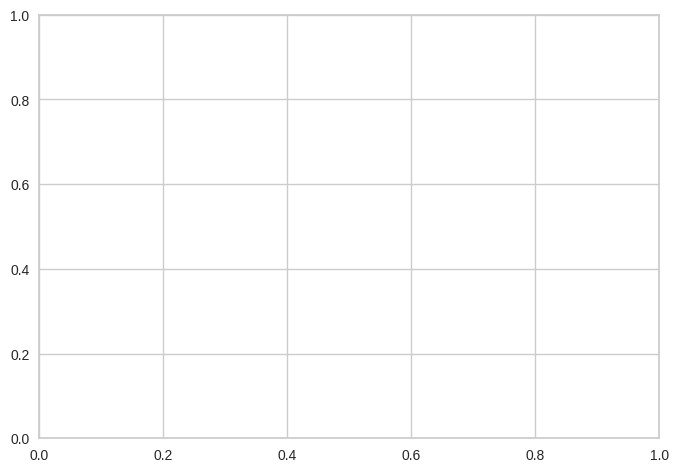

In [ ]:
evaluate_model(best)

In [ ]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.4803,0.3241,0.5693,0.9132,0.1622,0.2744


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,prediction_label
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,1.286772
17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1.425681
73,seahorse,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4,3.764436
83,sparrow,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2,2.293647
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1.712111
77,seawasp,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,7,5.873942
58,penguin,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0,1,2,2.420099
95,vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2,2.074678
82,sole,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4,3.764436
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1.425681
